In [1]:
import numpy as np
import math

# New Section

# New Section

In [43]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Spiral Dataset

In [ ]:
# Ques 2 a LDA

In [3]:
import pandas as pd

#df = pd.read_csv('/content/sample_data/circles0.3.csv')

df = pd.read_csv('/content/sample_data/spiral1.csv')

print(df)

X=df[['x','y']]
#X= df[['x1','x2']]
y=df['label']

            x         y  label
0    -1.60023   7.69407    0.0
1     7.03777   9.76350    1.0
2     9.29608  -9.16002    0.0
3     3.95189  12.31531    1.0
4     0.56410   4.34127    0.0
..        ...       ...    ...
995  14.23334  -2.59433    0.0
996   1.54775  10.99383    1.0
997   8.59973   2.69069    1.0
998  -7.24296   3.13314    0.0
999   7.24604 -10.25400    0.0

[1000 rows x 3 columns]


In [7]:
df.head()


,x,y,label
0,-1.60023,7.69407,0.0
1,7.03777,9.76350,1.0
2,9.29608,-9.16002,0.0
3,3.95189,12.31531,1.0
4,0.56410,4.34127,0.0


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
def LDA(x_train, y_train,x_test):

  model = LinearDiscriminantAnalysis()
  # Train model
  model.fit(x_train,y_train)
  # define model evaluation method
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  
  # Predict test data
  y_pred = model.predict(x_test)
  #ppv = precision_score(y, scores)

  return model, cv, y_pred, scores



In [46]:
model, cv, y_pred, scores = LDA(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean Accuracy: 0.750 (0.049)


In [47]:
def get_metrics(y_test, y_pred):
  # Model Accuracy: how often is the classifier correct?
  score = metrics.accuracy_score(y_test, y_pred)
  #print("Accuracy:",score)
  ppv = precision_score(y_test, y_pred)
  #print(ppv)

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

  npv = 0
  if(fn!=0):
    npv = tn / (tn + fn) # Specificity
    #print (npv)

  specificity = tn / (tn + fp) # Sensitivity (Recall)

  #print(specificity)

  sensitivity = recall_score(y_test, y_pred)
  #print(sensitivity)

  return score, ppv, npv, specificity, sensitivity


In [129]:
def plotGraph(X,y):
  plt.figure(figsize=(10,6))
  plt.scatter(X['x1'], X['x2'], c=y, cmap='Spectral')
  plt.show()


In [48]:
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

 Accuracy Score: 0.7633333333333333
 PPV: 0.7516339869281046
 NPV: 0.7755102040816326
 specificity: 0.75
 sensitivity: 0.777027027027027


In [ ]:
# 2b

In [49]:
def QDA(x_train, y_train, x_test):
  # Train thr model
  model = QuadraticDiscriminantAnalysis()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  #Define method to evaluate model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

  #evaluate model with 10 folds
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

  return model, cv, y_pred, scores


In [50]:
model, cv, y_pred, scores = QDA(x_train, y_train, x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.749 (0.050)


In [51]:
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

 Accuracy Score: 0.7633333333333333
 PPV: 0.7516339869281046
 NPV: 0.7755102040816326
 specificity: 0.75
 sensitivity: 0.777027027027027


In [ ]:
# que 2 c

In [52]:
# gaussian naive bayes
def NB(x_train, y_train,x_test):
  model = GaussianNB()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  #Define method to evaluate model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

  #evaluate model with 10 folds
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

  print("Naive Bayes score: ",model.score(x_test, y_test))
  return model, cv, y_pred, scores

In [53]:
model, cv, y_pred, scores = NB(x_train, y_train, x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Naive Bayes score:  0.7433333333333333
Mean Accuracy: 0.733 (0.047)
 Accuracy Score: 0.7433333333333333
 PPV: 0.7320261437908496
 NPV: 0.7551020408163265
 specificity: 0.7302631578947368
 sensitivity: 0.7567567567567568


In [ ]:
# ques 2 d


In [ ]:
# # Import train_test_split function
# from sklearn.model_selection import train_test_split

# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test


In [60]:
# SVM model

def SVM(x_train, y_train, x_test):
  #Create a svm Classifier
  model = svm.SVC(kernel='linear') # Linear Kernel

  #Train the model using the training sets
  model.fit(x_train, y_train)

  #Predict the response for test dataset
  y_pred = model.predict(x_test)
  #Define method to evaluate model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

  #evaluate model with 10 folds
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

  return model, cv, y_pred, scores

In [61]:
model, cv, y_pred, scores = SVM(x_train, y_train, x_test)
# summarize result

accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

 Accuracy Score: 0.76
 PPV: 0.7533333333333333
 NPV: 0.7666666666666667
 specificity: 0.756578947368421
 sensitivity: 0.7635135135135135


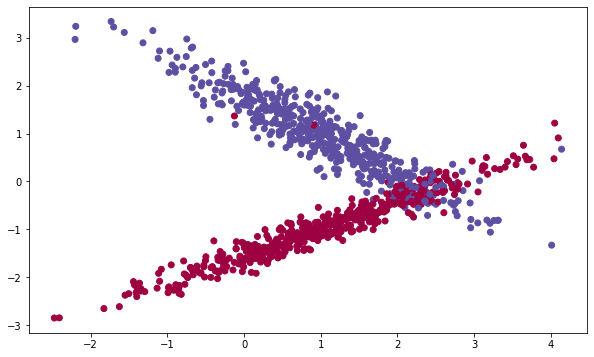

In [130]:
plotGraph(X,y)

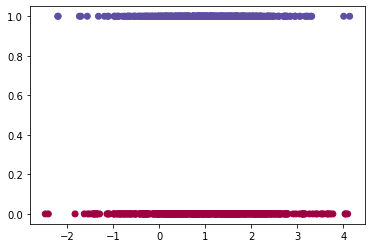

In [106]:
plt.scatter(X['x1'],y,c=y,cmap='Spectral')
plt.show()


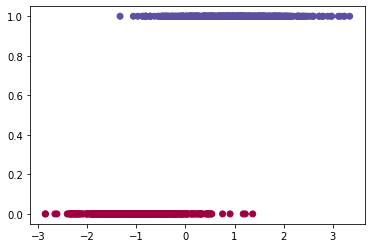

In [107]:
plt.scatter(X['x2'],y,c=y,cmap='Spectral')
plt.show()

# Applying above models on ALL Datasets

## Circles Dataset

In [132]:
df = pd.read_csv('/content/sample_data/circles0.3.csv')
X= df[['x1','x2']]
y=df['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [64]:
model, cv, y_pred, scores = LDA(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.456 (0.053)
 Accuracy Score: 0.5
 PPV: 0.4918918918918919
 NPV: 0.5130434782608696
 specificity: 0.38562091503267976
 sensitivity: 0.6190476190476191


In [65]:
model, cv, y_pred, scores = QDA(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.992 (0.009)
 Accuracy Score: 0.9933333333333333
 PPV: 1.0
 NPV: 0.9870967741935484
 specificity: 1.0
 sensitivity: 0.9863945578231292


In [66]:
model, cv, y_pred, scores = NB(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Naive Bayes score:  0.9933333333333333
Mean Accuracy: 0.992 (0.009)
 Accuracy Score: 0.9933333333333333
 PPV: 1.0
 NPV: 0.9870967741935484
 specificity: 1.0
 sensitivity: 0.9863945578231292


In [67]:
model, cv, y_pred, scores = SVM(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.626 (0.028)
 Accuracy Score: 0.62
 PPV: 0.5673469387755102
 NPV: 0.8545454545454545
 specificity: 0.30718954248366015
 sensitivity: 0.9455782312925171


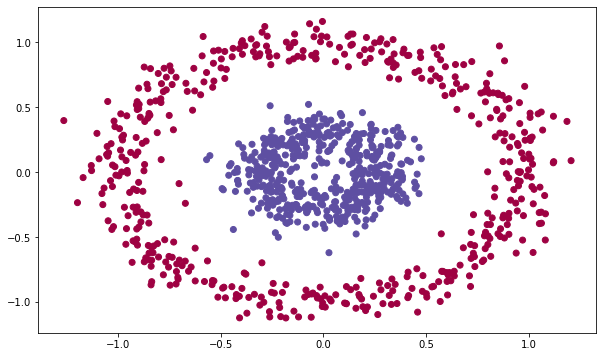

In [133]:
plotGraph(X,y)

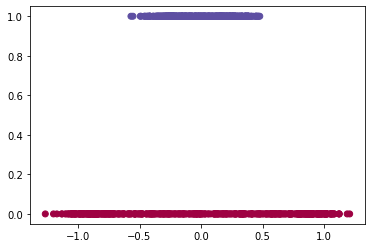

In [110]:
plt.scatter(X['x1'],y,c=y,cmap='Spectral')
plt.show()


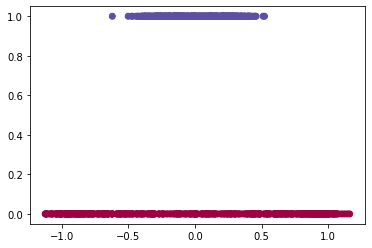

In [111]:
plt.scatter(X['x2'],y,c=y,cmap='Spectral')
plt.show()


## Moons1 Dataset

In [134]:
df = pd.read_csv('/content/sample_data/moons1.csv')

In [69]:
df.head()

,x1,x2,label
0,-0.674481,0.469321,0
1,0.566712,-0.284153,1
2,-0.257384,0.230913,1
3,1.868980,0.610969,1
4,-0.579194,0.842457,0


In [135]:

X= df[['x1','x2']]
y=df['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [71]:
model, cv, y_pred, scores = LDA(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.883 (0.033)
 Accuracy Score: 0.8733333333333333
 PPV: 0.8859060402684564
 NPV: 0.8609271523178808
 specificity: 0.8843537414965986
 sensitivity: 0.8627450980392157


In [72]:
model, cv, y_pred, scores = QDA(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.882 (0.034)
 Accuracy Score: 0.8733333333333333
 PPV: 0.8859060402684564
 NPV: 0.8609271523178808
 specificity: 0.8843537414965986
 sensitivity: 0.8627450980392157


In [73]:
model, cv, y_pred, scores = NB(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Naive Bayes score:  0.8733333333333333
Mean Accuracy: 0.883 (0.032)
 Accuracy Score: 0.8733333333333333
 PPV: 0.8859060402684564
 NPV: 0.8609271523178808
 specificity: 0.8843537414965986
 sensitivity: 0.8627450980392157


In [74]:
model, cv, y_pred, scores = SVM(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.880 (0.034)
 Accuracy Score: 0.86
 PPV: 0.87248322147651
 NPV: 0.847682119205298
 specificity: 0.8707482993197279
 sensitivity: 0.8496732026143791


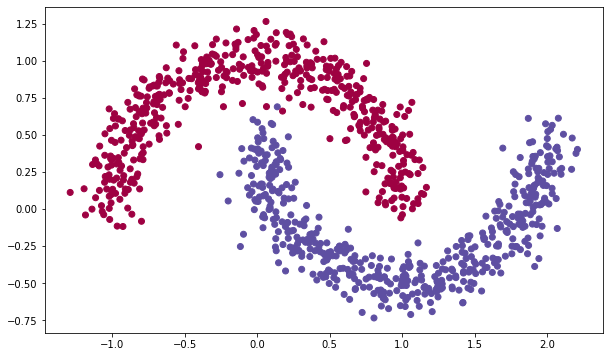

In [136]:
plotGraph(X,y)

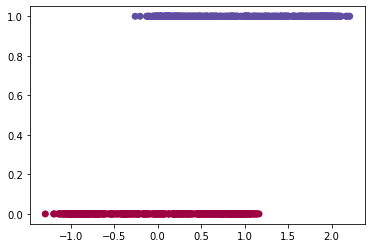

In [117]:
plt.scatter(X['x1'],y,c=y,cmap='Spectral')
plt.show()


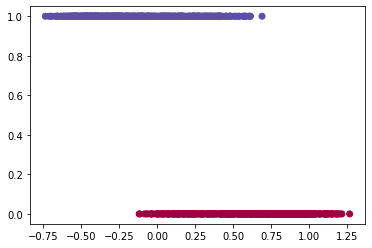

In [118]:
plt.scatter(X['x2'],y,c=y,cmap='Spectral')
plt.show()


## Half Kernel Dataset

In [137]:
df = pd.read_csv('/content/sample_data/halfkernel.csv')
df.head()

,x1,x2,label
0,-2.93,-9.01,0
1,-9.33,11.40,0
2,-3.36,4.51,0
3,-7.29,10.40,0
4,-9.72,-12.00,0


In [138]:

X= df[['x1','x2']]
y=df['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [79]:
model, cv, y_pred, scores = LDA(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.669 (0.041)
 Accuracy Score: 0.68
 PPV: 0.6956521739130435
 NPV: 0.6666666666666666
 specificity: 0.72
 sensitivity: 0.64


In [80]:
model, cv, y_pred, scores = QDA(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.939 (0.024)
 Accuracy Score: 0.9366666666666666
 PPV: 0.9781021897810219
 NPV: 0.901840490797546
 specificity: 0.98
 sensitivity: 0.8933333333333333


In [81]:
model, cv, y_pred, scores = NB(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Naive Bayes score:  0.9533333333333334
Mean Accuracy: 0.941 (0.026)
 Accuracy Score: 0.9533333333333334
 PPV: 0.9927536231884058
 NPV: 0.9197530864197531
 specificity: 0.9933333333333333
 sensitivity: 0.9133333333333333


In [82]:
model, cv, y_pred, scores = SVM(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.732 (0.032)
 Accuracy Score: 0.7466666666666667
 PPV: 0.8363636363636363
 NPV: 0.6947368421052632
 specificity: 0.88
 sensitivity: 0.6133333333333333


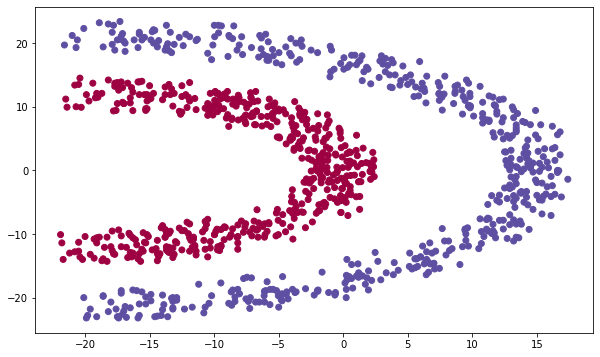

In [139]:
plotGraph(X,y)

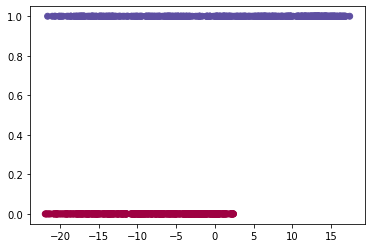

In [122]:
plt.scatter(X['x1'],y,c=y,cmap='Spectral')
plt.show()


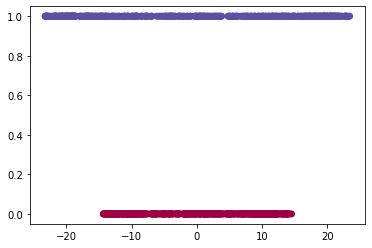

In [123]:
plt.scatter(X['x2'],y,c=y,cmap='Spectral')
plt.show()


## Two Gaussians

In [143]:
df = pd.read_csv('/content/sample_data/twogaussians42.csv')
df.head()

,x1,x2,label
0,0.601034,1.535353,1
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,0.753178,0.787514,1


In [144]:

X= df[['x1','x2']]
y=df['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [85]:
model, cv, y_pred, scores = LDA(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.899 (0.030)
 Accuracy Score: 0.8866666666666667
 PPV: 0.9407407407407408
 NPV: 0.8424242424242424
 specificity: 0.9455782312925171
 sensitivity: 0.8300653594771242


In [86]:
model, cv, y_pred, scores = QDA(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.948 (0.019)
 Accuracy Score: 0.94
 PPV: 0.972027972027972
 NPV: 0.910828025477707
 specificity: 0.9727891156462585
 sensitivity: 0.9084967320261438


In [87]:
model, cv, y_pred, scores = NB(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Naive Bayes score:  0.8833333333333333
Mean Accuracy: 0.905 (0.029)
 Accuracy Score: 0.8833333333333333
 PPV: 0.927536231884058
 NPV: 0.845679012345679
 specificity: 0.9319727891156463
 sensitivity: 0.8366013071895425


In [88]:
model, cv, y_pred, scores = SVM(x_train, y_train,x_test)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy, ppv,npv,specificity,sensitivity = get_metrics(y_test, y_pred)
print(f" Accuracy Score: {accuracy}\n PPV: {ppv}\n NPV: {npv}\n specificity: {specificity}\n sensitivity: {sensitivity}")

Mean Accuracy: 0.924 (0.025)
 Accuracy Score: 0.9133333333333333
 PPV: 0.9922480620155039
 NPV: 0.8538011695906432
 specificity: 0.9931972789115646
 sensitivity: 0.8366013071895425


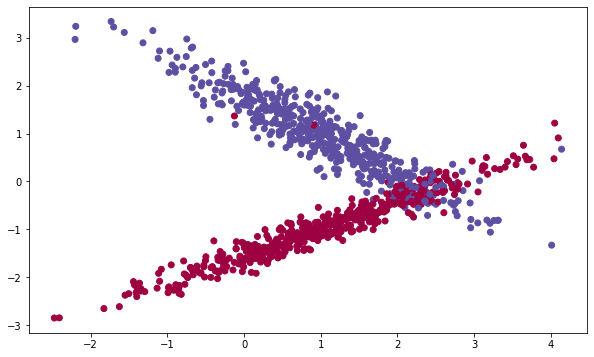

In [145]:
plotGraph(X,y)

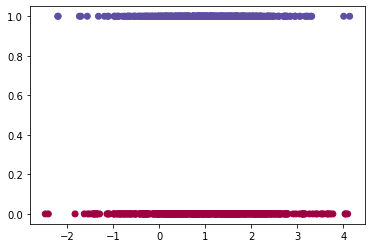

In [126]:
plt.scatter(X['x1'],y,c=y,cmap='Spectral')
plt.show()


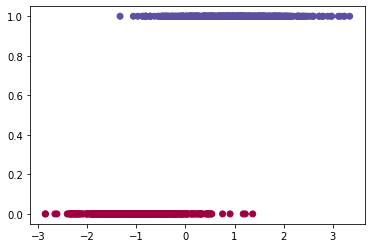

In [127]:
plt.scatter(X['x2'],y,c=y,cmap='Spectral')
plt.show()


In [128]:
# colors = {0:'red', 1:'blue'}
# markers = {0:'x', 1:'o'}



# for class_label in set(y):
#   class_indices = (y == class_label)
#   plt.scatter(X[class_indices, 0], X[class_indices, 1], label=class_label, c=colors[class_label], marker=markers[class_label])